# Regressão Múltipla

In [45]:
import numpy as np
import math
import time
from sklearn import linear_model

## 1. Regressão Múltipla com sklearn

Neste documento, a ideia é criar um modelo de regressão linear múltipla. Esse modelo será ajustado aos dados de notas de alunos de computação da UFCG em algumas disciplinas do primeiro período. A última coluna é a variável alvo representando o CRA final depois de concluir o curso. As outras colunas são algumas disciplinas do primeiro período. O pressuposto aqui é que as notas em disciplinas no primeiro período ajudam a explicar o CRA final dos alunos de computação.

Primeiramente, vou usar a biblioteca *sklearn* para criar o modelo. Depois de criado o modelo linear, a função *fit()* o ajusta aos dados (**X** contém todas as colunas de notas dos alunos e **Y** é o vetor com a coluna do cra).

In [46]:
grades = np.genfromtxt("sample_students_grades.csv", delimiter=",", skip_header=1)

X = grades[:,[0,1,2,3,4]]
Y = grades[:,5][:,np.newaxis]

startTime = time.time()
linear_reg = linear_model.LinearRegression() # this creates a linear regression object
linear_reg.fit(X,Y) #this function fits a linear model

endTime = time.time()
#print(linear_reg.score(X,Y)) #R² error
#print(linear_reg.coef_) # w1, w2, w3, ...
#print(linear_reg.intercept_) # w0
print("After {0} ms intercept = {1}, linear_coefficients = {2} error (R²) = {3}".format(str(1000*(endTime-startTime)), linear_reg.intercept_, linear_reg.coef_, linear_reg.score(X,Y)))

After 1.0075569152832031 ms intercept = [1.73771151], linear_coefficients = [[0.10304143 0.0464367  0.16409834 0.38117843 0.02027816]] error (R²) = 0.423803240951211


## 2. Regressão Múltipla "do zero"

Agora, farei um modelo e o ajustarei aos dados sem utilizar a biblioteca. Ao final, compararei os coeficientes do novo modelo com os coeficientes do modelo criado anteriormente. Isso será o teste que indicará se o novo algoritmo está funcionando corretamente.



### 2.1 Mean Squared Error

$MSE(\hat{w})=\frac{1}{N}(y-\hat{\mathbf{w}}^T\mathbf{x})^T(y-\hat{\mathbf{w}}^T\mathbf{x})$

In [72]:
# Compute the Mean Squared Error
def compute_mse_vectorized(w,X,Y):
    res = Y - np.dot(X, w)
    totalError = np.dot(res.T,res)
    return totalError / float(len(Y))

### 2.2 Gradient

A condição de parada do nosso algoritmo é baseada no gradiente do RSS, dado pela seguinte fórmula, onde H é a matriz de variáveis e seus valores, y o vetor de resultados e w é vetor dos parâmetros: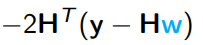

In [42]:

def step_gradient_vectorized(w_current,X,Y,learningRate):
    
    res = Y - np.dot(X, w_current) # (y−Hw)
   
    gradients = np.multiply(-2, np.dot(X.T, res)) # -2H.T (y−Hw)
    
    rate = np.multiply(learningRate, gradients)  # α * -2H.T (y−Hw)  
    
    new_w = w_current - rate # w(t) − α * -2H.T (y−Hw)
    
    return [new_w,gradients]

In [70]:
def gradient_descent_runner_vectorized(starting_w, X,Y, learning_rate, epsilon):
    w = starting_w
    gradients = np.array([np.inf])
    i = 0
    while (np.linalg.norm(gradients)>=epsilon):
        w,gradients = step_gradient_vectorized(w, X, Y, learning_rate)
        
        #print(np.linalg.norm(gradients))
        
        if i % 10000 == 0:
            print("MSE in the iteration {0} is equals to {1}".format(i,compute_mse_vectorized(w, X, Y)))
        i+= 1
    print("It converged with {0} iterations.".format(i))
    return w

#### Main

Como pode-se observar pela saída, o código converge com 333314 iterações quando os parâmetros são: **learning_rate = 0.00003** e **epsilon = 0.00001**. Os dois parâmetros foram sendo variados até que os coeficientes se aproximassem dos coeficientes encontrados pelo modelo criado com a biblioteca sklearn.

Depois de aproximadamente 3385 ms, w0 = 1.73770337, w1 = 0.10304158, w2 = 0.04643707, w3 = 0.16409833, w4 = 0.38117884  e w5 = 0.02027826, com erro de 0.41133759. 

Como é possível observar, esses valores se aproximam dos valores retornados pelo modelo criado com a biblioteca sklearn, com a precisão de 4 casas decimais. Apenas o erro se aproxima com a precisão de somente 1 casa decimal.
Relembrando, os valores do modelo do sklearn foram: w0 = 1.73771151, w1 = 0.10304143, w2 = 0.0464367, w3 = 0.16409834, w4 = 0.38117843 e w5 = 0.02027816, com erro de 0.423803240951211;


In [71]:
grades_incremented = np.c_[np.ones(len(grades)),grades]

X = grades_incremented[:,[0,1,2,3,4,5]] # grades without cra
Y = grades_incremented[:,6][:,np.newaxis] # cra
init_w = np.zeros((6,1)) # vector of coefficients

learning_rate = 0.00003
epsilon = 0.00001

print("Starting gradient descent at w = {0}, error = {1}".format(init_w.T, compute_mse_vectorized(init_w, X,Y)))
print("Running...")
startTime = time.time()
w = gradient_descent_runner_vectorized(init_w, X,Y, learning_rate, epsilon)
endTime = time.time()
print("After {0} ms w = {1}, error = {2}".format(str(1000*(endTime-startTime)), w.T, compute_mse_vectorized(w,X,Y)))




Starting gradient descent at w = [[0. 0. 0. 0. 0. 0.]], error = [[54.47995386]]
Running...
MSE in the iteration 0 is equals to [[15.39415211]]
MSE in the iteration 10000 is equals to [[0.42109776]]
MSE in the iteration 20000 is equals to [[0.41601668]]
MSE in the iteration 30000 is equals to [[0.41358078]]
MSE in the iteration 40000 is equals to [[0.41241299]]
MSE in the iteration 50000 is equals to [[0.41185314]]
MSE in the iteration 60000 is equals to [[0.41158475]]
MSE in the iteration 70000 is equals to [[0.41145608]]
MSE in the iteration 80000 is equals to [[0.41139439]]
MSE in the iteration 90000 is equals to [[0.41136482]]
MSE in the iteration 100000 is equals to [[0.41135064]]
MSE in the iteration 110000 is equals to [[0.41134385]]
MSE in the iteration 120000 is equals to [[0.41134059]]
MSE in the iteration 130000 is equals to [[0.41133903]]
MSE in the iteration 140000 is equals to [[0.41133828]]
MSE in the iteration 150000 is equals to [[0.41133792]]
MSE in the iteration 16000